#  Train a GAN On a One-Dimensional Function

In [19]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import matplotlib.pyplot as plt
import torch.optim as optim

In [66]:
#define a function for sampling from real data distribution
def generate_real_data(n):
    x1 = np.random.uniform(-0.5,0.5,size=(n,1)) 
    x2 = x1**2                               
    return torch.from_numpy(np.hstack((x1, x2))).float()

In [67]:
#define discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, 25)
        self.output = nn.Linear(25, 1)
        
    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = self.output(out)
        return out

In [68]:
#define generator model 
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        
        self.fc1 = nn.Linear(latent_dim, 15)
        self.out = nn.Linear(15, output_dim)
        
    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = self.out(out)
        return out

In [69]:
#define real loss
def real_loss(d_out) :
    batch_size = d_out.size(0)
    #create labels for real data
    labels = torch.ones(batch_size, 1)
    
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(d_out, labels)
    return loss

#define fake loss 
def fake_loss(d_out):
    batch_size = d_out.size(0)
    #create labels for fake data
    
    labels = torch.zeros(batch_size, 1)
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(d_out, labels)
    return loss

In [70]:
#set hyperparametrs
latent_dim = 5
lr = 0.001

#instantiate Generator and Descriminator
D = Discriminator(2) 
G = Generator(latent_dim,2)

#define optimizers for discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr, betas=(0.5,0.999))
g_optimizer = optim.Adam(G.parameters(), lr, betas=(0.5,0.999))

D.train(),G.train()

(Discriminator(
   (fc1): Linear(in_features=2, out_features=25, bias=True)
   (output): Linear(in_features=25, out_features=1, bias=True)
 ),
 Generator(
   (fc1): Linear(in_features=5, out_features=15, bias=True)
   (out): Linear(in_features=15, out_features=2, bias=True)
 ))

In [71]:
def generate_latent_points(n_samples, latent_dim):
    #generate latent samples from a standard normal
    latent = np.random.normal(0,1,size=(n_samples, latent_dim))
    latent = torch.from_numpy(latent).float()
    return latent

In [72]:
#define a function for evaluate the GAN performance subjectively by examinig plots
def summarize_performance(n_samples, epoch, save_fig=False):
    #sample from a real data distribution for visualization
    real_data = generate_real_data(n_samples)
    
    latent = generate_latent_points(n_samples, latent_dim)
    
    #generate synthetic samples
    synthetic_data = G(latent)
    
    #plot these 2 samples in scatter plots
    plt.scatter(real_data[:,0].detach(), real_data[:,1].detach(), color='blue', label='Real Distribution')
    plt.scatter(synthetic_data[:,0].detach(), synthetic_data[:,1].detach(), color='red', label='Generated Distribution')
    plt.legend()
    
    #saving plot
    if save_fig:
        filename = 'generated_plot{}'.format(epoch)
        plt.savefig(filename)
    
    plt.show()
    plt.close()

Epoch: 200 | d_loss: 1.3745174407958984 | g_loss: 0.7091397643089294


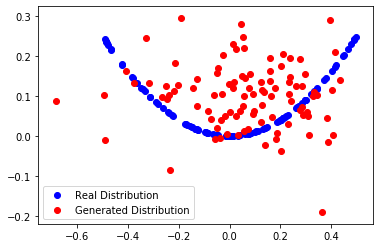

Epoch: 400 | d_loss: 1.3867436647415161 | g_loss: 0.6884945631027222


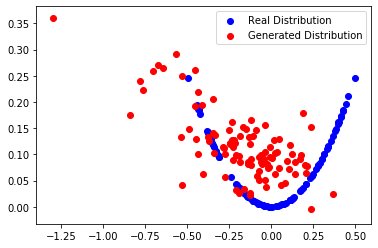

Epoch: 600 | d_loss: 1.3843858242034912 | g_loss: 0.6943004131317139


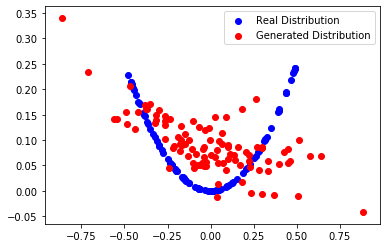

Epoch: 800 | d_loss: 1.3845865726470947 | g_loss: 0.6962639093399048


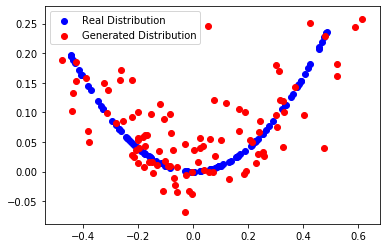

Epoch: 1000 | d_loss: 1.3832772970199585 | g_loss: 0.6955933570861816


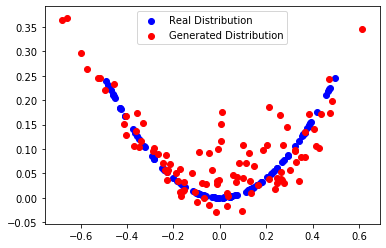

Epoch: 1200 | d_loss: 1.3854453563690186 | g_loss: 0.6934599876403809


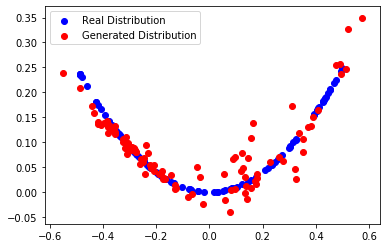

Epoch: 1400 | d_loss: 1.3862348794937134 | g_loss: 0.6929057836532593


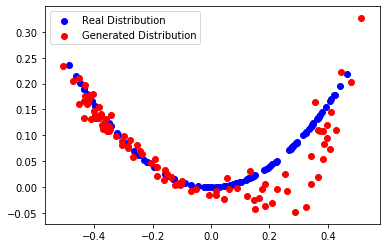

Epoch: 1600 | d_loss: 1.3826420307159424 | g_loss: 0.6946772336959839


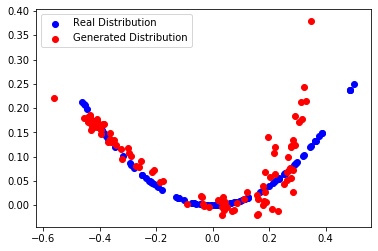

Epoch: 1800 | d_loss: 1.385183334350586 | g_loss: 0.6933634877204895


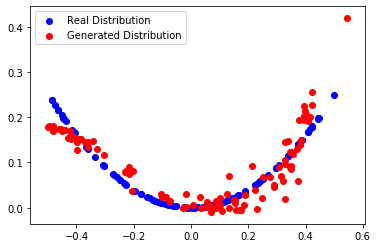

Epoch: 2000 | d_loss: 1.3854053020477295 | g_loss: 0.6916046738624573


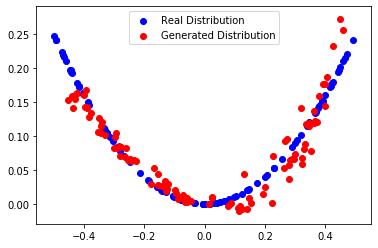

Epoch: 2200 | d_loss: 1.386169672012329 | g_loss: 0.6926159262657166


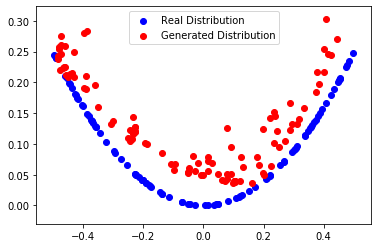

Epoch: 2400 | d_loss: 1.3865115642547607 | g_loss: 0.6913236975669861


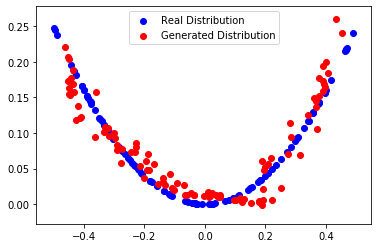

Epoch: 2600 | d_loss: 1.3859741687774658 | g_loss: 0.6941295862197876


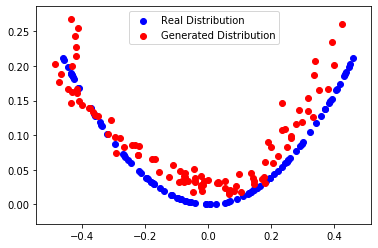

Epoch: 2800 | d_loss: 1.385845422744751 | g_loss: 0.6935709714889526


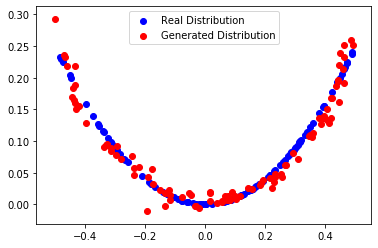

Epoch: 3000 | d_loss: 1.3866063356399536 | g_loss: 0.6932263374328613


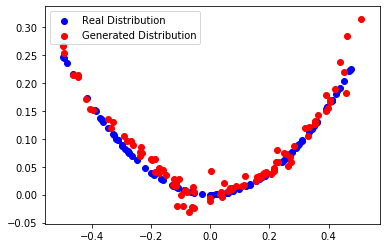

Epoch: 3200 | d_loss: 1.3872995376586914 | g_loss: 0.6919626593589783


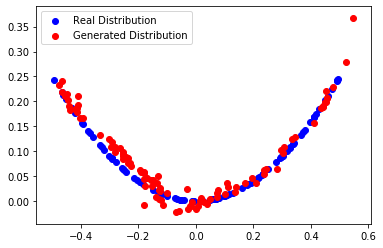

Epoch: 3400 | d_loss: 1.3858375549316406 | g_loss: 0.695258617401123


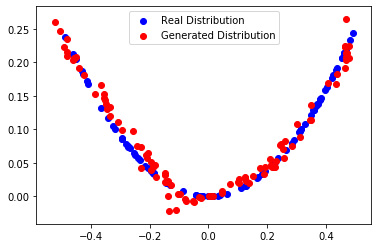

Epoch: 3600 | d_loss: 1.386940836906433 | g_loss: 0.6940446496009827


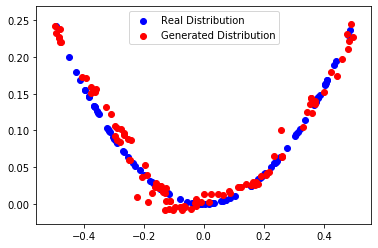

Epoch: 3800 | d_loss: 1.387032151222229 | g_loss: 0.6930319666862488


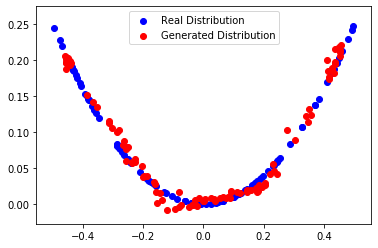

Epoch: 4000 | d_loss: 1.386270523071289 | g_loss: 0.6938433051109314


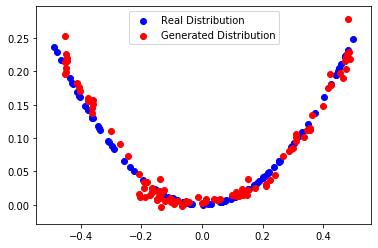

Epoch: 4200 | d_loss: 1.3872902393341064 | g_loss: 0.6930972337722778


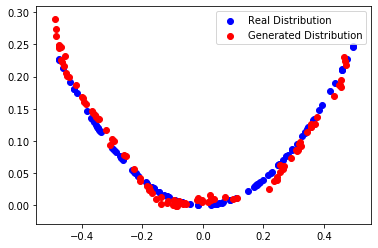

Epoch: 4400 | d_loss: 1.3864881992340088 | g_loss: 0.6942626237869263


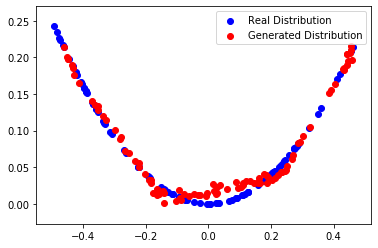

Epoch: 4600 | d_loss: 1.387610673904419 | g_loss: 0.6919791102409363


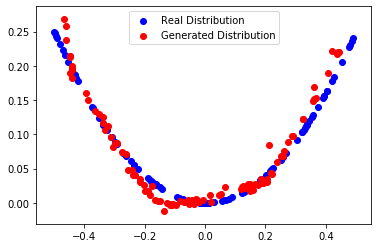

Epoch: 4800 | d_loss: 1.3860540390014648 | g_loss: 0.693367600440979


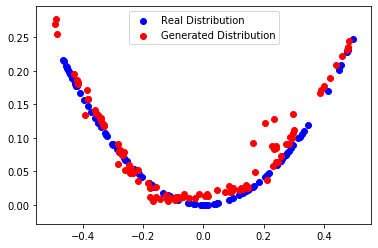

Epoch: 5000 | d_loss: 1.3862614631652832 | g_loss: 0.6936770081520081


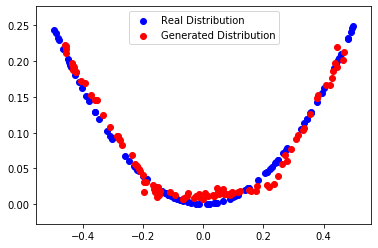

Epoch: 5200 | d_loss: 1.386063575744629 | g_loss: 0.6927919387817383


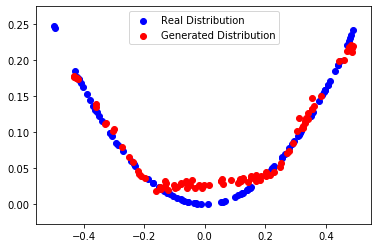

Epoch: 5400 | d_loss: 1.3864020109176636 | g_loss: 0.6932247281074524


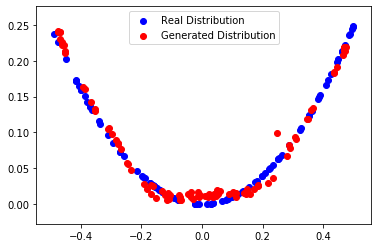

Epoch: 5600 | d_loss: 1.3864006996154785 | g_loss: 0.693374514579773


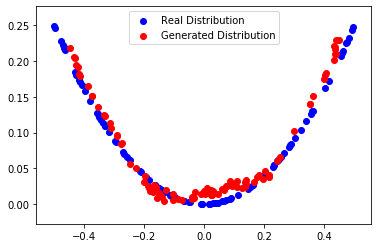

Epoch: 5800 | d_loss: 1.386101484298706 | g_loss: 0.6928590536117554


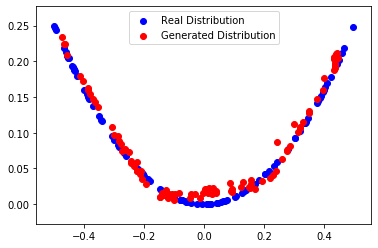

Epoch: 6000 | d_loss: 1.3859951496124268 | g_loss: 0.6946069002151489


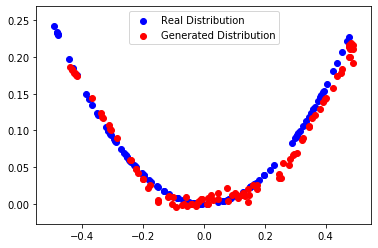

Epoch: 6200 | d_loss: 1.3865234851837158 | g_loss: 0.6936395764350891


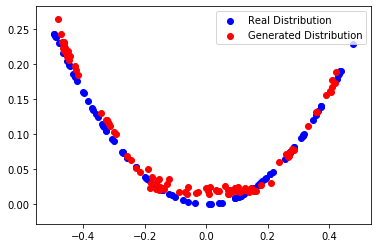

Epoch: 6400 | d_loss: 1.3851491212844849 | g_loss: 0.6916571259498596


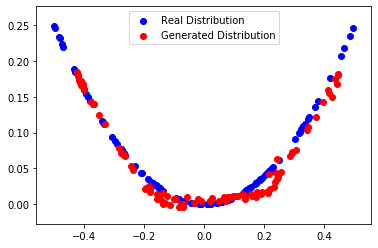

Epoch: 6600 | d_loss: 1.3867084980010986 | g_loss: 0.6933011412620544


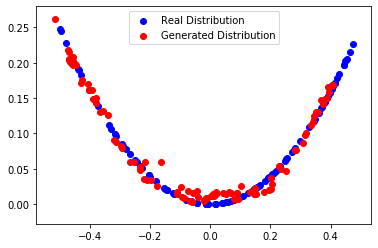

Epoch: 6800 | d_loss: 1.3875415325164795 | g_loss: 0.692574143409729


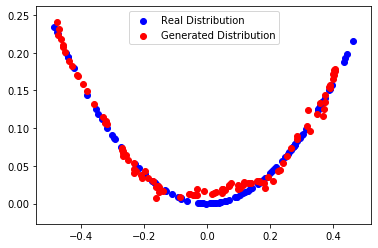

Epoch: 7000 | d_loss: 1.3861751556396484 | g_loss: 0.6936794519424438


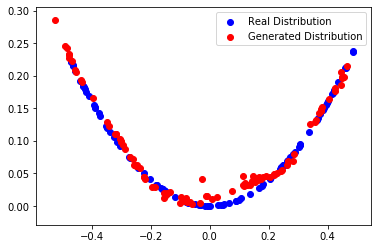

Epoch: 7200 | d_loss: 1.3855489492416382 | g_loss: 0.6927729845046997


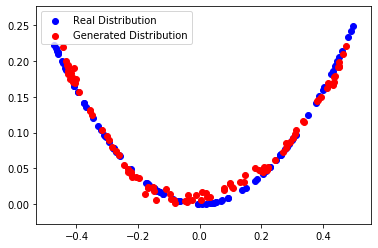

Epoch: 7400 | d_loss: 1.3858575820922852 | g_loss: 0.6937411427497864


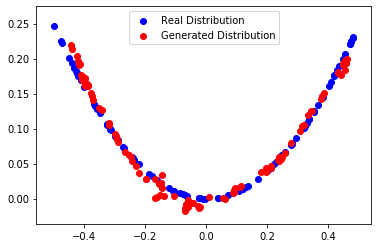

Epoch: 7600 | d_loss: 1.38612699508667 | g_loss: 0.6939062476158142


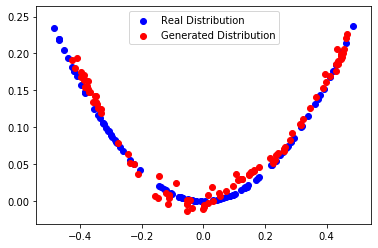

Epoch: 7800 | d_loss: 1.3858307600021362 | g_loss: 0.6931816339492798


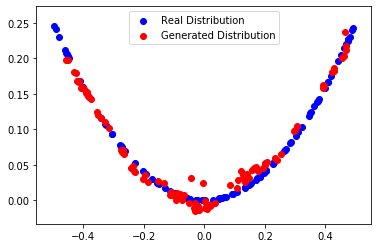

Epoch: 8000 | d_loss: 1.3870182037353516 | g_loss: 0.6945435404777527


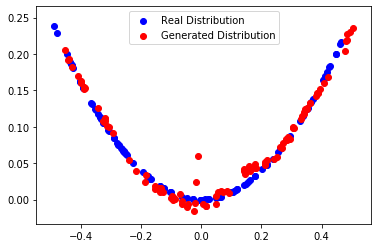

Epoch: 8200 | d_loss: 1.386580467224121 | g_loss: 0.6924856901168823


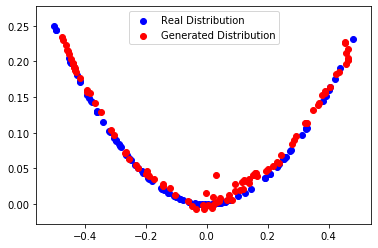

Epoch: 8400 | d_loss: 1.3856606483459473 | g_loss: 0.6916604042053223


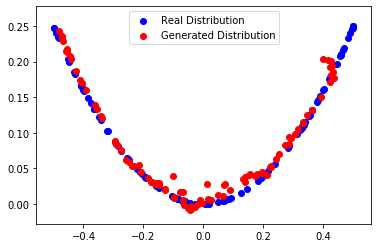

Epoch: 8600 | d_loss: 1.3866450786590576 | g_loss: 0.6931100487709045


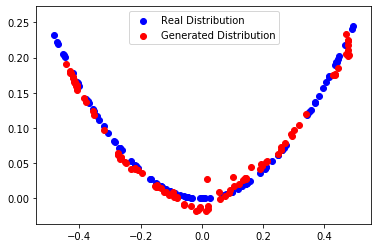

Epoch: 8800 | d_loss: 1.3870129585266113 | g_loss: 0.6956998705863953


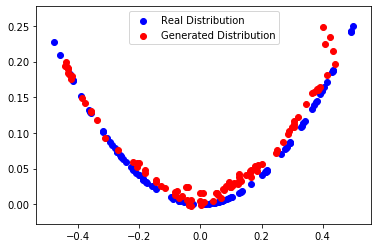

Epoch: 9000 | d_loss: 1.3856329917907715 | g_loss: 0.6933329105377197


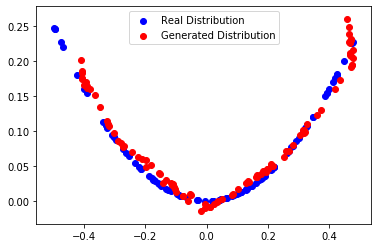

Epoch: 9200 | d_loss: 1.385439395904541 | g_loss: 0.694832444190979


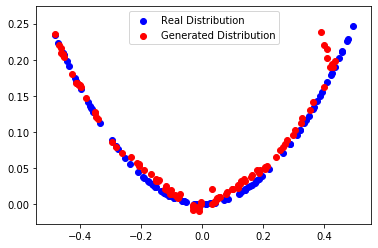

Epoch: 9400 | d_loss: 1.3864898681640625 | g_loss: 0.6931994557380676


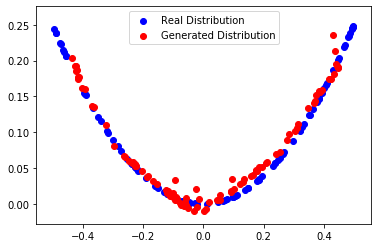

Epoch: 9600 | d_loss: 1.3868485689163208 | g_loss: 0.6942939758300781


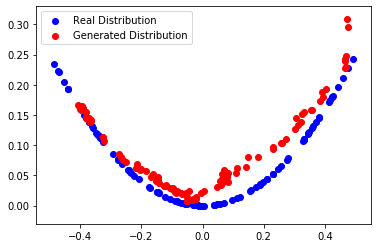

Epoch: 9800 | d_loss: 1.3856719732284546 | g_loss: 0.6936328411102295


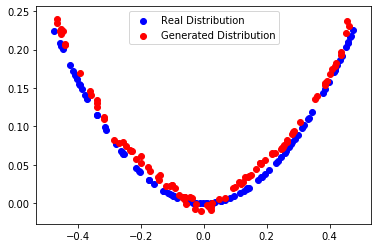

Epoch: 10000 | d_loss: 1.3859200477600098 | g_loss: 0.6941832304000854


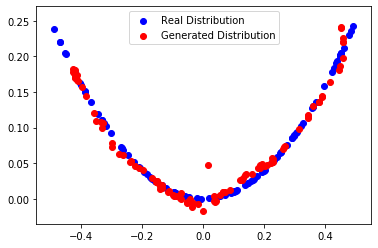

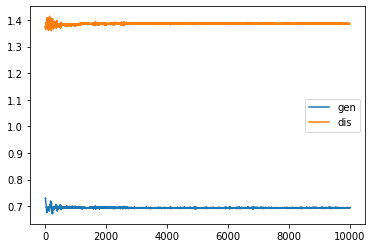

In [73]:
#set parameters related to training
epochs = 10000
batch_size = 128
show_every = 200

gen_losses = []
dis_losses = []

#implement training loop
for i in range(1 ,epochs+1):
    
    #=========================================
    #        Train Discriminator
    #=========================================

    d_optimizer.zero_grad()
    #get a batch from real distribution
    real_data  = generate_real_data(batch_size)

    #calculate loss on real samples
    real_output = D(real_data)
    d_r_loss = real_loss(real_output)

    #generate latent samples from a standard normal
    latent = generate_latent_points(batch_size, latent_dim)
    fake_data = G(latent)

    fake_output = D(fake_data)
    d_f_loss = fake_loss(fake_output)

    #accumilate losses
    d_loss = d_r_loss + d_f_loss

    dis_losses.append(d_loss)

    d_loss.backward()
    d_optimizer.step()

    #===========================================
    #         Train Generator
    #===========================================
    g_optimizer.zero_grad()

    #generate latent samples for generator
    latent = generate_latent_points(batch_size, latent_dim)
    fake_data = G(latent)

    fake_output = D(fake_data)
    g_loss = real_loss(fake_output)

    gen_losses.append(g_loss)

    g_loss.backward()
    g_optimizer.step()

    if i%show_every == 0:
       print(f'Epoch: {i} | d_loss: {d_loss} | g_loss: {g_loss}')
       summarize_performance(100, i)
    
plt.plot(gen_losses, label='gen')
plt.plot(dis_losses, label='dis')
plt.legend()
plt.show()